# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

The data represents 17 marketing campaigns conducted by a Portuguese bank between May 2008 and November 2010. 

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [8]:
import pandas as pd

In [9]:
bank_client_df = pd.read_csv('data/bank-additional-full.csv', sep = ';')

In [10]:
bank_client_df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



In [12]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.dummy import DummyClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from category_encoders import JamesSteinEncoder #not sure if using
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
import time


In [13]:
bank_client_df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [14]:
bank_client_df.isnull().sum() #just double checking that there are no null values

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [15]:
(bank_client_df == 'unknown').sum()

age                  0
job                330
marital             80
education         1731
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64

In [138]:
#mode_value = bank_client_df["job"].mode()[0]
#bank_client_df["job"] = bank_client_df["job"].replace("unknown", mode_value)
#marital_mode = bank_client_df["marital"].mode()[0]

# Replace "unknown" with the mode
#bank_client_df["marital"] = bank_client_df["marital"].replace("unknown", marital_mode)
#education_mode = bank_client_df["education"].mode()[0]

# Replace "unknown" with the mode
#bank_client_df["education"] = bank_client_df["education"].replace("unknown", education_mode)


### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

In [140]:
bank_client_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [142]:
print("=====================================================")
for column in bank_client_df.columns:
    total_count = len(bank_client_df)
    unknown_count = (bank_client_df[column] == 'unknown').sum()
    unknown_percentage = round((unknown_count / total_count) * 100, 2)
    print(f"Column: {column} |  Unknown Percentage: {unknown_percentage} %")

#vehicles_df['type'].value_counts()

Column: age |  Unknown Percentage: 0.0 %
Column: job |  Unknown Percentage: 0.0 %
Column: marital |  Unknown Percentage: 0.0 %
Column: education |  Unknown Percentage: 0.0 %
Column: default |  Unknown Percentage: 20.87 %
Column: housing |  Unknown Percentage: 2.4 %
Column: loan |  Unknown Percentage: 2.4 %
Column: contact |  Unknown Percentage: 0.0 %
Column: month |  Unknown Percentage: 0.0 %
Column: day_of_week |  Unknown Percentage: 0.0 %
Column: duration |  Unknown Percentage: 0.0 %
Column: campaign |  Unknown Percentage: 0.0 %
Column: pdays |  Unknown Percentage: 0.0 %
Column: previous |  Unknown Percentage: 0.0 %
Column: poutcome |  Unknown Percentage: 0.0 %
Column: emp.var.rate |  Unknown Percentage: 0.0 %
Column: cons.price.idx |  Unknown Percentage: 0.0 %
Column: cons.conf.idx |  Unknown Percentage: 0.0 %
Column: euribor3m |  Unknown Percentage: 0.0 %
Column: nr.employed |  Unknown Percentage: 0.0 %
Column: y |  Unknown Percentage: 0.0 %


In [144]:
bank_client_df.groupby('default')['y'].value_counts(normalize=True)

default  y  
no       no     0.87121
         yes    0.12879
unknown  no     0.94847
         yes    0.05153
yes      no     1.00000
Name: proportion, dtype: float64


**Business Objective**


In this dataset, the target is whether a client subscribed to a long-term deposit — similar to what we would call a Certificate of Deposit (CD) in the U.S.
This is a marketing campaign dataset from a Portuguese bank, aimed at predicting which clients would commit to a fixed-term savings product.

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

In [176]:
#categorical_data = ["job", "marital_status", "education", "default", "housing", "loan", "contact", "month", "day_of_week", "poutcome"]
#numerical_data = [['age', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']]
categorical_columns = bank_client_df.select_dtypes(include=['object']).columns.tolist()
categorical_columns = [col for col in categorical_columns if col != 'y']

numerical_columns = bank_client_df.select_dtypes(include=['float64', 'int64']).columns.tolist()
#numerical_columns = [col for col in numerical_columns if col != "duration"]
print (numerical_columns)
#DO I encode everything here?  Hmmm ....

# Preprocessor setup
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),
        ('cat', JamesSteinEncoder(), categorical_columns)
    ])

#bank_client_encoded = bank_client_df.drop(columns=columns_to_encode).join(encoded_df)

['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']


### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [178]:
X = bank_client_df.drop('y', axis=1)  # replace with your actual target column name
y = bank_client_df['y']
print(y.value_counts(normalize=True))

# Encode the target variable
le = LabelEncoder()
y = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


y
no     0.887346
yes    0.112654
Name: proportion, dtype: float64


### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [180]:
# Step 2: Fit DummyClassifier on training data
dummy_clf = DummyClassifier(strategy="most_frequent")  # or "stratified" or other strategies
dummy_clf.fit(X_train, y_train)

DummyClassifier(strategy='most_frequent')

In [182]:
# Step 3: Evaluate on test data
baseline_score = dummy_clf.score(X_test, y_test)
print("Baseline accuracy on test set:", baseline_score)

Baseline accuracy on test set: 0.8865015780529255


### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [184]:
log_reg = Pipeline([
    ('preprocessor', preprocessor),
    ('log_reg', LogisticRegression())
])
log_reg.fit(X_train, y_train)



Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['age', 'duration',
                                                   'campaign', 'pdays',
                                                   'previous', 'emp.var.rate',
                                                   'cons.price.idx',
                                                   'cons.conf.idx', 'euribor3m',
                                                   'nr.employed']),
                                                 ('cat', JamesSteinEncoder(),
                                                  ['job', 'marital',
                                                   'education', 'default',
                                                   'housing', 'loan', 'contact',
                                                   'month', 'day_of_week',
                                                   'poutcome'])])),
                ('log_reg', LogisticRegression())])

### Problem 9: Score the Model

What is the accuracy of your model?

In [186]:
log_reg_accuracy = log_reg.score(X_test, y_test)
print (log_reg_accuracy)

0.9079873755765963


In [188]:
dec_tree = Pipeline([
    ('preprocessor', preprocessor),
    ('decision', DecisionTreeClassifier())
])
dec_tree.fit(X_train, y_train)
dec_tree_accuracy = dec_tree.score(X_test, y_test)
print ("Decision Tree Accuracy : " + str(dec_tree_accuracy))

Decision Tree Accuracy : 0.8861374119932023


In [190]:
svc = Pipeline([
    ('preprocessor', preprocessor),
    ('decision', SVC())
])
svc.fit(X_train, y_train)
svc_accuracy = svc.score(X_test, y_test)
print ("SVM: " + str(svc_accuracy))

SVM: 0.9082301529497451


### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [196]:
models = {
    'knn': (KNeighborsClassifier(), {'knn__n_neighbors': [3, 5, 7]}),
    'logisticregression': (LogisticRegression(max_iter=1000), {'logisticregression__C': [0.1, 1, 10]}),
    'svc': (SVC(), {'svc__C': [0.1, 1, 10], 'svc__kernel': ['linear', 'rbf']}),
    'decisiontree': (DecisionTreeClassifier(), {'decisiontree__max_depth': [5, 10, 15]})
}

results = []

# Train and evaluate each model
for name, (model, params) in models.items(): 
    # Create a pipeline with StandardScaler and the model
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        (name, model)
    ])
    start_time = time.time()
    pipeline.fit(X_train, y_train)
    end_time=time.time()
    y_pred_train = pipeline.predict(X_train)
    train_score = accuracy_score(y_train, y_pred_train)

    
    y_pred = pipeline.predict(X_test)
    test_score = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred, pos_label=1)
    precision = precision_score(y_test, y_pred, pos_label=1)
    f1 = f1_score(y_test, y_pred, pos_label=1)
    print (test_score)

    fit_time = end_time-start_time
    # Append the results
    results.append([name, train_score, test_score, recall, f1, precision, fit_time])

# Create the results DataFrame
results_df = pd.DataFrame(results, columns=['model', 'train score', 'test score', 'recall', 'f1-score', 'precision','fit time'])
#results_df.set_index('model', inplace=True)

# Display the DataFrame
print(results_df)

0.9011896091284293
0.9079873755765963
0.9082301529497451
0.885773245933479
                model  train score  test score    recall  f1-score  precision  \
0                 knn     0.933293    0.901190  0.482353  0.525641   0.577465   
1  logisticregression     0.910046    0.907987  0.398930  0.496011   0.655536   
2                 svc     0.913293    0.908230  0.404278  0.500000   0.655113   
3        decisiontree     1.000000    0.885773  0.515508  0.506037   0.496907   

   fit time  
0  0.143973  
1  0.185021  
2  4.347707  
3  0.214855  


In [198]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
print(confusion_matrix(y_test, y_pred))

[[6815  488]
 [ 453  482]]


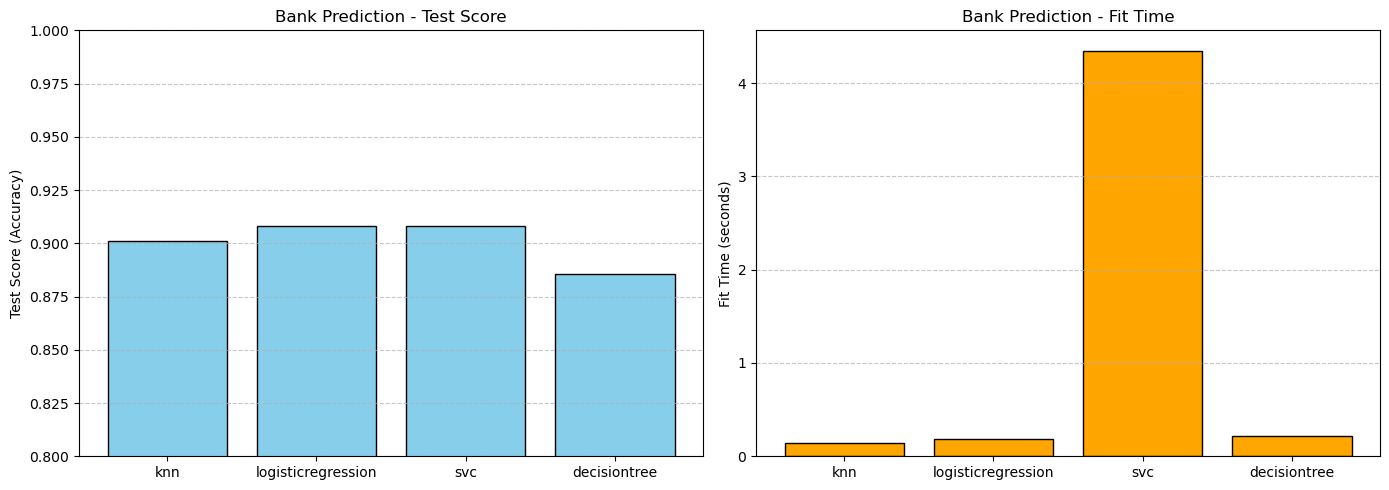

In [200]:
# Digits data with standardized labels and matching order
#results_df_plot = results_df.reset_index()
# ----- Plot Churn Data -----
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
axes[0].bar(results_df['model'], results_df['test score'], color='skyblue', edgecolor='black')
axes[0].set_ylim(0.8, 1.0)
axes[0].set_ylabel('Test Score (Accuracy)')
axes[0].set_title('Bank Prediction - Test Score')
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

axes[1].bar(results_df['model'], results_df['fit time'], color='orange', edgecolor='black')
axes[1].set_ylabel('Fit Time (seconds)')
axes[1].set_title('Bank Prediction - Fit Time')
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

In [326]:
# BEST MODEL RESULTS use when testing to speed up runtimes
#{'knn__n_neighbors': 7}
#0.9046130500758724
#{'logisticregression__C': 0.1, 'logisticregression__penalty': 'l2'}
#0.9096813353566009
#{'decisiontree__criterion': 'entropy', 'decisiontree__max_depth': 5, 'decisiontree__max_features': None, 'decisiontree__min_samples_leaf': 4, 'decisiontree__min_samples_split': 2}
#0.9138694992412747

In [356]:

models = {
    #'knn': (
    #    KNeighborsClassifier(), 
    #    {
    #        'knn__n_neighbors': [3, 5, 7],
    #        'knn__weights': ['uniform', 'distance']
    #    }, 
    #),
    #'logisticregression': (
    #    LogisticRegression(max_iter=1000), 
    #    {
    #        'logisticregression__C': [0.1, 1, 10],
    #        'logisticregression__penalty': ['l1', 'l2', 'elasticnet']
    #    }
    #),
        #'logisticregression': (
    #    LogisticRegression(max_iter=1000), 
    #    {
    #        'logisticregression__C': [0.1, 1, 10],
    #        'logisticregression__penalty': ['l1', 'l2', 'elasticnet']
    #    }
    #),
    #'svc': (
    #     SVC(), 
    #     {'svc__C': [0.01, 0.1, 1, 10, 100] 
    #      'svc__kernel': ['linear', 'rbf'],
    #'svc__gamma': ['scale', 'auto', 0.01, 0.1, 1] # Kernel coefficient (very important for 'rbf') 
    #     }
    #),
    'svc': (
         SVC(), 
         {'svc__C': [10], 
          'svc__kernel': ['rbf'],
          'svc__gamma': [0.1] # Kernel coefficient (ve#ry important for 'rbf')
         }
    ),
    #DecisionTreeClassifier(), 
    #    {
    #        'decisiontree__max_depth': [4, 5, 10, 15, None],
    #        'decisiontree__criterion': ['gini', 'entropy'],
    #        'decisiontree__max_features': [None, 'sqrt', 'log2'] # number of features to consider when splitting
            #'decisiontree__min_samples_split': [2, 5, 10],        # min samples to split an internal node
            #'decisiontree__min_samples_leaf': [1, 2, 4], 
    #    }
    #)
}

results= []
for name, (model, params) in models.items():
    # Create a pipeline with StandardScaler and the model
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        (name, model)
    ])

    # Perform grid search
    grid_search = GridSearchCV(pipeline, param_grid=params, cv=5, n_jobs=-1)
    
    # Fit the model and time it
    start_time = time.time()
    grid_search.fit(X_train, y_train)
    fit_time = (time.time() - start_time) / len(grid_search.cv_results_['mean_fit_time'])
    
    # Get the best estimator
    best_model = grid_search.best_estimator_
    #print(grid_search.cv_results_)
    print(grid_search.best_params_)
    print(grid_search.best_score_)
    
    ## Evaluate on training and test sets
    y_pred = grid_search.predict(X_test)
    train_score = best_model.score(X_train, y_train)
    test_score = best_model.score(X_test, y_test)
    recall = recall_score(y_test, y_pred, pos_label=1)
    precision = precision_score(y_test, y_pred, pos_label=1)
    f1 = f1_score(y_test, y_pred, pos_label=1)
    
    # Append the results
    results.append([name, train_score, test_score, recall, precision, f1, fit_time])

# Create the results DataFrame
results_df = pd.DataFrame(results, columns=['model', 'train score', 'test score', "recall","precision", "f1", 'fit time'])
#results_df.set_index('model', inplace=True)


{'svc__C': 10, 'svc__gamma': 0.1, 'svc__kernel': 'rbf'}
0.9108042488619119


In [350]:
print (results)

results_df = pd.DataFrame(results, columns=['model', 'train score', 'test score', 'recall', 'precision', 'f1', 'fit time'])

[['svc', 0.9207587253414264, 0.9135712551590192, 0.8802139037433155, 0.4441446303291959, 0.5903873744619799, 7.729036808013916]]


In [352]:
print (results_df)

  model  train score  test score    recall  precision        f1  fit time
0   svc     0.920759    0.913571  0.880214   0.444145  0.590387  7.729037


In [478]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
#{'logisticregression__C': 0.1, 'logisticregression__penalty': 'l2'}
# Preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),
        ('cat', OneHotEncoder(drop='first'), categorical_columns)
])

# Build pipeline with SMOTE
modeling_pipeline = ImbPipeline(steps=[
    ('preprocess', preprocessor),
    #('oversampler', RandomOverSampler()),
    #('undersampler', RandomUnderSampler()),
    ('smote', SMOTE()),
    #('model', LogisticRegression(max_iter=1000, C=.1, penalty='l2'))
    ('model', DecisionTreeClassifier(max_depth=5, criterion="entropy", max_features=None, splitter="best", random_state=42))
])
#{'decisiontree__criterion': 'entropy', 'decisiontree__max_depth': 5, 'decisiontree__max_features': None, 'decisiontree__min_samples_leaf': 4, 'decisiontree__min_samples_split': 2}
modeling_pipeline.fit(X_train, y_train)
#X_train, X_test, y_train, y_test = train_test_split(X_train_resampled, y_train_resampled, random_seed=42)
y_pred = modeling_pipeline.predict(X_test)
smote_accuracy = accuracy_score(y_test, y_pred)
#print ("Smote Logistic Regression Accuracy : " + str(smote_accuracy))
print ("Smote Logistic Regression Accuracy : " + str(smote_accuracy))

C:\Users\lorig\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


Smote Logistic Regression Accuracy : 0.8372177713037144


In [480]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
#print(classification_report(y_test, y_pred))

# Extract values
tn, fp, fn, tp = cm[0][0], cm[0][1], cm[1][0], cm[1][1]

# Calculate metrics
accuracy = (tp + tn) / (tp + tn + fp + fn)
precision = tp / (tp + fp) if (tp + fp) > 0 else 0
recall = tp / (tp + fn) if (tp + fn) > 0 else 0
f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

# Display
print(f"Accuracy:  {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall:    {recall:.2f}")
print (f"F1:         {f1:.2f}")   

[[6052 1251]
 [  90  845]]
Accuracy:  0.84
Precision: 0.40
Recall:    0.90
F1:         0.56


In [ ]:
None of the models performed better than without sampling.  I tried RandomOverSampler, RandomUnderSampler anad SMOTE.   

In all cases the accuracy went down and the precision went down, while the recall accuracy went up.

Even thought the accuracy went down for this business case let's look at what this actually means. 
False positive means that you may have to sell to someone who doesn't convert. 
That's ok because sales people are used to trying to convert to people who say no.  
What we want is fewer false negatives because we don't want to miss selling to people who might convert. 
So even though the accuracy went down below the baseline, SMOTE gives us some useful information that can be used by the sales team. 
It’s okay to contact more people if it means catching the ones who would actually say yes.

Use SMOTE produced a 90% recall.
The RandomUnderSampler actually had the highest recall at 95%.  

Because we have a huge majority class we can afford to get rid of some of the majority class and so underfitting works in this case.


##### Questions